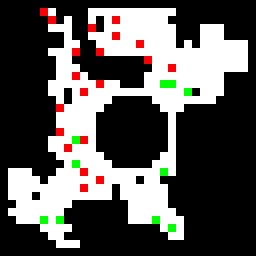

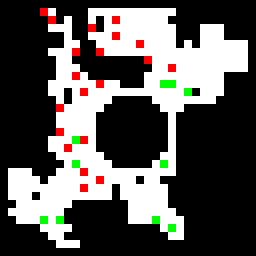

[(20, 11), (20, 12), (20, 13), (19, 10), (18, 10), (20, 9), (20, 8), (20, 7), (20, 6), (20, 5), (20, 4), (20, 3), (20, 2), (20, 1), (22, 10), (23, 10), (24, 10), (25, 10), (26, 10), (27, 10), (21, 11), (21, 12), (21, 13), (21, 14), (21, 15), (21, 16), (21, 17), (21, 18), (21, 19), (21, 20), (21, 21), (21, 9), (23, 12), (22, 11), (21, 11), (20, 11), (19, 11), (18, 11), (17, 11), (16, 11), (15, 11), (14, 11), (13, 11), (12, 11), (11, 11), (23, 10), (23, 9), (23, 8), (23, 7), (23, 6), (23, 5), (9, 18), (9, 19), (8, 17), (7, 17), (6, 17), (9, 16), (9, 15), (9, 14), (9, 13), (9, 12), (9, 11), (9, 10), (10, 20), (11, 20), (12, 20), (13, 20), (9, 21), (9, 22), (9, 23), (9, 24), (8, 20), (9, 19), (9, 18), (21, 20), (20, 21), (19, 20), (20, 19), (6, 27), (5, 28), (4, 27), (3, 27), (2, 27), (5, 26), (5, 25), (5, 24), (5, 23), (7, 28), (7, 29), (7, 30), (6, 27), (7, 26), (7, 25), (7, 24), (7, 23), (7, 22), (7, 21), (20, 27), (21, 27), (22, 27), (18, 27), (17, 27), (16, 27), (19, 26), (19, 25), (1

In [1]:
import cv2
import time
import numpy as np
from PIL import Image
from IPython import display

#load data
def lm():
    M={}    
    P=[]
    l=[x.strip() for x in open("15.txt").readlines()]
    for y in range(len(l)):
        for x in range(len(l[0])):
            if l[y][x]!='#':
                M[(x,y)]=1
            if l[y][x] in "EG":
                M[(x,y)] = [l[y][x],200,3]
                #print(x,y,M[(x,y)])
    #print(P)
    return M

#print map
def printmap(M):
    X,Y = zip(*M.keys())
    w = max(X)+2
    h = max(Y)+2
    pix = np.zeros([h,w,3]).astype(np.ubyte)
    for y in range(h):
        l = ""
        for x in range(w):
            if (x,y) in M:
                if M[(x,y)] == 1:
                    pix[y,x,:] = [255,255,255]    
                    l += " "
                else:
                    l += M[(x,y)][0]
                    if M[(x,y)][0] == 'E':
                        pix[y,x,:] = [0,255,0]    
                    else:
                        pix[y,x,:] = [255,0,0]    
                    
            else:
                pix[y,x,:] = [0,0,0]    
                l += "#"
        #print(l)
    F = 8
    #pix[6,1,:] = [255,0,255]
    pix = cv2.resize(pix, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    #display.clear_output(wait=True)
    
    
    
    display.display(Image.fromarray(pix, 'RGB'))

def isopen(M,x,y):
    return (x,y) in M and M[(x,y)]==1
    
def move(M, x0, y0, x1, y1):
    #locations must be in map
    assert((x0,y0) in M)
    assert((x1,y1) in M)
    #cant move air
    assert(M[(x0,y0)] != 1)
    #must be 
    assert(M[(x1,y1)] == 1)
    #only single horizontal or vertical moves moves
    assert(abs(x0-x1)+abs(y0-y1) == 1)
    
    t = M[(x0,y0)]
    M[(x0,y0)] = M[(x1,y1)]
    M[(x1,y1)] = t
    return M

#return ordered keys
def getpiecekeys(M, t=None):
    p = [x for x in M.keys() if M[x] != 1 and (t== None or M[x][0]==t)]
    p.sort(key=lambda x: x[1]*100+x[0])
    return p

def getattackpositions(M, t):
    ap=[]
    for x,y in getpiecekeys(M, t):
        for dx,dy in [(1,0),(0,1),(-1,0),(0,-1)]:
            xx=x+dx
            yy=y+dy
            while isopen(M,xx,yy):
                ap.append((xx,yy))
                xx+=dx
                yy+=dy
    return ap
            
        
    

M = lm()
printmap(M)
M = move(M, 20, 21, 20, 20)
printmap(M)
print(getattackpositions(M,'E'))
    
running=True
turn=1
while running:
    #make list of all pieces that can move
    #go through list. 
    #if unit still alive
        #if can attack:
            #attack
        #breadth first search for place to go
            #go
    #print map
    turn +=1
    
    
    
    
    


In [2]:
def part1():
    print("aaaaaaaaaa")
    
    M,P=lm()
    printmap(M,P)
    
    fighting = True
    while fighting:
        for i in range(len(P)):
            x0,y0,tp0,hp0,a0=P[i]
            
            #find all enemies
            enemies = []
            for j in range(len(P)):
                x1,y1,tp1,hp1,a1=P[j]
                if i != j and tp0 != tp1:
                    enemies.append(j)
            if len(enemies) == 0:
                fighting = False
            
            fightlocations = {}
            for j in enemies:
                for dx,dy in [(-1,0),(1,0),(0,-1),(0,1)]:
                    x1,y1,tp1,hp1,a1=P[j]
                    x = x1 + dx
                    y = y1 + dy
                    while 1:
                        if not (x,y) in M:
                            fightlocations[(x,y)]=j
                            x+=dx
                            y+=dy
            
            if (x0,y0) in fightlocations:
                pass    
    return 1


#print("part1:",part1(),0)


In [1]:
from typing import NamedTuple
from dataclasses import dataclass
import enum
import itertools
import collections

class Pt(NamedTuple('Pt', [('x', int), ('y', int)])):
    def __add__(self, other):
        return type(self)(self.x + other.x, self.y + other.y)

    @property
    def nb4(self):
        return [self + d for d in [Pt(0, 1), Pt(1, 0), Pt(0, -1), Pt(-1, 0)]]

class Team(enum.Enum):
    ELF = enum.auto()
    GOBLIN = enum.auto()

@dataclass
class Unit:
    team: Team
    position: Pt
    hp: int = 200
    alive: bool = True
    power: int = 3

class ElfDied(Exception):
    pass

class Grid(dict):
    def __init__(self, lines, power=3):
        super().__init__()

        self.units = []

        for i, line in enumerate(lines):
            for j, el in enumerate(line):
                self[Pt(i, j)] = el == '#'

                if el in 'EG':
                    self.units.append(Unit(
                        team={'E': Team.ELF, 'G': Team.GOBLIN}[el],
                        position=Pt(i, j),
                        power={'E': power, 'G': 3}[el]
                    ))

    def play(self, elf_death=False):
        rounds = 0
        while True:
            if self.round(elf_death=elf_death):
                break
            rounds += 1
        return rounds * sum(unit.hp for unit in self.units if unit.alive)

    def round(self, elf_death=False):
        for unit in sorted(self.units, key=lambda unit: unit.position):
            if unit.alive:
                if self.move(unit, elf_death=elf_death):
                    return True

    def move(self, unit, elf_death=False):
        targets = [target for target in self.units if unit.team != target.team and target.alive]
        occupied = set(u2.position for u2 in self.units if u2.alive and unit != u2)

        if not targets:
            return True

        in_range = set(pt for target in targets for pt in target.position.nb4 if not self[pt] and pt not in occupied)

        if not unit.position in in_range:
            move = self.find_move(unit.position, in_range)

            if move:
                unit.position = move

        opponents = [target for target in targets if target.position in unit.position.nb4]

        if opponents:
            target = min(opponents, key=lambda unit: (unit.hp, unit.position))

            target.hp -= unit.power

            if target.hp <= 0:
                target.alive = False
                if elf_death and target.team == Team.ELF:
                    raise ElfDied()

    def find_move(self, position, targets):
        visiting = collections.deque([(position, 0)])
        meta = {position: (0, None)}
        seen = set()
        occupied = {unit.position for unit in self.units if unit.alive}

        while visiting:
            pos, dist = visiting.popleft()
            for nb in pos.nb4:
                if self[nb] or nb in occupied:
                    continue
                if nb not in meta or meta[nb] > (dist + 1, pos):
                    meta[nb] = (dist + 1, pos)
                if nb in seen:
                    continue
                if not any(nb == visit[0] for visit in visiting):
                    visiting.append((nb, dist + 1))
            seen.add(pos)

        try:
            min_dist, closest = min((dist, pos) for pos, (dist, parent) in meta.items() if pos in targets)
        except ValueError:
            return

        while meta[closest][0] > 1:
            closest = meta[closest][1]

        return closest

lines = open('15.txt').read().splitlines()

grid = Grid(lines)

print('part 1:', grid.play())

for power in itertools.count(4):
    try:
        outcome = Grid(lines, power).play(elf_death=True)
    except ElfDied:
        continue
    else:
        print('part 2:', outcome)
        break

part 1: 217890
part 2: 43645


In [ ]:
#I got totally stuck on this for months. Revisit when I feel the urge. 